Extract gridcells along route: 2D

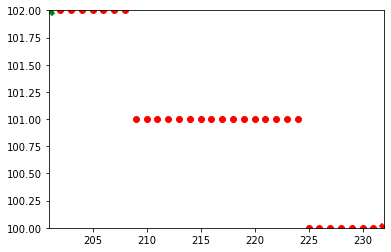

In [2]:
def bresenham_line(x1, y1, x2, y2):
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    x, y = x1, y1
    sx = -1 if x1 > x2 else 1
    sy = -1 if y1 > y2 else 1

    if dx > dy:
        err = dx / 2
        while x != x2:
            yield x, y
            err -= dy
            if err < 0:
                y += sy
                err += dx
            x += sx
    else:
        err = dy / 2
        while y != y2:
            yield x, y
            err -= dx
            if err < 0:
                x += sx
                err += dy
            y += sy
    yield x, y

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

start=(201,102)
end=(232,100)

# Get the points on the line
points = list(bresenham_line(*start, *end))

# Print the list of points
# print(points)

# Create a plot
fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the points on the line
ax.scatter([p[0] for p in points], [p[1] for p in points], c='r', marker='o')

# Plot the start and end points
ax.scatter(start[0], start[1], c='g', marker='X', s=100)
ax.scatter(end[0], end[1], c='r', marker='X', s=100)

# Set the limits for the axes
ax.set_xlim(min([p[0] for p in points]), max([p[0] for p in points]))
ax.set_ylim(min([p[1] for p in points]), max([p[1] for p in points]))

# Display the plot
plt.show()

Concatenate

In [3]:
def concatenate(start, goal, individual):
    individual_full=individual.copy()

    individual_full.insert(0,start)
    individual_full.append(goal)

    return individual_full

Generate individual functions:
1. Random points
2. All points with LOS excluding goal point
3. All points with LOS including goal point (X second timeout)
4. Variable length individuals

In [4]:
def generate_individual(i,_):
    
    # Generate a random sequence of waypoints
    individual = []

    start=time.time()

    possible_points = np.argwhere(environment >= minimum_bs)

    while len(individual) < limit:
        index = random.choice(range(len(possible_points)))
        point = tuple(possible_points[index])
        possible_points = np.delete(possible_points, index, axis=0)
        y, x = point

        print(f"{i+1} / {POPULATION_SIZE} individuals generated: {round((time.time()-start),5)} Seconds elapsed", end='\r')

        if environment[y,x] >= minimum_bs:
            individual.append((x, y))

    return individual

In [5]:
def generate_individual_2(i,_):
    # Generate a random sequence of waypoints
    individual = []
    limit=INDIVIDUAL_LENGTH

    start=time.time()
    # print("\n")
    possible_points = np.argwhere(environment >= minimum_bs)

    while len(individual) < limit:
        index = random.choice(range(len(possible_points)))
        point = tuple(possible_points[index])
        possible_points = np.delete(possible_points, index, axis=0)
        y, x = point

        # print(f"{round((time.time()-start),5)} Seconds elapsed", end='\r')
        print(f"{i+1} / {POPULATION_SIZE} individuals generated: {round((time.time()-start),5)} Seconds elapsed", end='\r')

        if (time.time()-start)>10:
            return 0

        obstacles_hit=0

        if len(individual)==0:
            #Find all cells along line
            end_point=(x,y)

            cell_list=bresenham_line(*start_point,*end_point)

            for cell in cell_list:
                x,y=cell

                #if obstacle hit then flip flag
                if environment[y,x]<minimum_bs:
                    obstacles_hit=1

            if obstacles_hit==0:

                individual.append((x, y))
        else:
            end_point=(x,y)

            #Find all cells along line

            cell_list=bresenham_line(*individual[-1],*end_point)

            for cell in cell_list:
                x,y=cell

                #if obstacle hit then flip flag
                if environment[y,x]<minimum_bs:
                    obstacles_hit=1

            if obstacles_hit==0:

                individual.append((x, y))
        
    return individual

In [6]:
def generate_individual_3(i,timeout):
    # Generate a random sequence of waypoints
    individual = []
    limit=INDIVIDUAL_LENGTH

    start=time.time()
    # print("\n")

    possible_points = np.argwhere(environment >= minimum_bs)

    while len(individual) < limit:
        index = random.choice(range(len(possible_points)))
        point = tuple(possible_points[index])
        possible_points = np.delete(possible_points, index, axis=0)
        y, x = point

        # print(f"{round((time.time()-start),5)} Seconds elapsed", end='\r')
        print(f"{i+1} / {POPULATION_SIZE} individuals generated: {round((time.time()-start),5)} Seconds elapsed", end='\r')

        if (time.time()-start)>timeout:
            return 0

        obstacles_hit=0

        if len(individual)<minimum_bs:
            #Find all cells along line
            end_point=(x,y)

            cell_list=bresenham_line(*start_point,*end_point)

            cell_list=list(cell_list)

            for cell in cell_list:
                x1,y1=cell

                #if obstacle hit then flip flag
                if environment[y1,x1]<minimum_bs:
                    obstacles_hit=1

            if obstacles_hit==0:

                individual.append((x, y))
                
        elif len(individual)>0 and len(individual)<(limit-1):
            #Find all cells along line
            end_point=(x,y)

            #Find all cells along line
            cell_list=bresenham_line(*individual[-1],*end_point)
            cell_list=list(cell_list)

            for cell in cell_list:
                x1,y1=cell

                #if obstacle hit then flip flag
                if environment[y1,x1]<minimum_bs:
                    obstacles_hit=1

            if obstacles_hit==0:

                individual.append((x, y))

        elif len(individual)==limit-1:
            
            end_point=(x,y)

            #Find all cells along line
            cell_list1=bresenham_line(*individual[-1],*end_point)
            cell_list1=list(cell_list1)

            cell_list2=bresenham_line(*end_point,*goal_point)
            cell_list2=list(cell_list2)

            cell_list=cell_list1.copy()
            cell_list.extend(cell_list2)

            for cell in cell_list:
                x1,y1=cell

                #if obstacle hit then flip flag
                if environment[y1,x1]<minimum_bs:
                    obstacles_hit=1

            if obstacles_hit==0:

                individual.append((x, y))

            else:
                individual=[]
                
        
    return individual

In [7]:
def generate_individual_4(i,timeout):
    # Generate a random sequence of waypoints
    individual = []
    limit=INDIVIDUAL_LENGTH

    start=time.time()
    # print("\n")

    possible_points = np.argwhere(environment >= minimum_bs)

    while len(individual) < limit:
        index = random.choice(range(len(possible_points)))
        point = tuple(possible_points[index])
        possible_points = np.delete(possible_points, index, axis=0)
        y, x = point

        # print(f"{round((time.time()-start),5)} Seconds elapsed", end='\r')
        print(f"{i+1} / {POPULATION_SIZE} individuals generated: {round((time.time()-start),5)} Seconds elapsed", end='\r')

        if (time.time()-start)>timeout:
            return 0

        if len(individual)>0:
            cell_list=bresenham_line(*individual[-1],*goal_point)

            cell_list=list(cell_list)

            for cell in cell_list:
                x1,y1=cell

                #if obstacle hit then flip flag
                if environment[y1,x1]<minimum_bs:
                    obstacles_hit=1

            if obstacles_hit==0:

                return individual

        obstacles_hit=0

        if len(individual)==0:
            #Find all cells along line
            end_point=(x,y)

            cell_list=bresenham_line(*start_point,*end_point)

            cell_list=list(cell_list)

            for cell in cell_list:
                x1,y1=cell

                #if obstacle hit then flip flag
                if environment[y1,x1]<minimum_bs:
                    obstacles_hit=1

            if obstacles_hit==0:

                individual.append((x, y))
                
        elif len(individual)>0 and len(individual)<(limit-1):

            #Find all cells along line
            end_point=(x,y)

            #Find all cells along line
            cell_list=bresenham_line(*individual[-1],*end_point)
            cell_list=list(cell_list)

            for cell in cell_list:
                x1,y1=cell

                #if obstacle hit then flip flag
                if environment[y1,x1]<minimum_bs:
                    obstacles_hit=1

            if obstacles_hit==0:

                individual.append((x, y))

        elif len(individual)==limit-1:
            
            end_point=(x,y)

            #Find all cells along line
            cell_list1=bresenham_line(*individual[-1],*end_point)
            cell_list1=list(cell_list1)

            cell_list2=bresenham_line(*end_point,*goal_point)
            cell_list2=list(cell_list2)

            cell_list=cell_list1.copy()
            cell_list.extend(cell_list2)

            for cell in cell_list:
                x1,y1=cell

                #if obstacle hit then flip flag
                if environment[y1,x1]<minimum_bs:
                    obstacles_hit=1

            if obstacles_hit==0:

                individual.append((x, y))

            else:
                individual=[]
                
        
    return individual


In [8]:
def generate_individual_5(i, timeout):

    # Generate a random sequence of waypoints
    individual = []
    limit = INDIVIDUAL_LENGTH

    start = time.time()

    possible_points = np.argwhere(environment >= minimum_bs)

    while len(individual) < limit:
        index = random.choice(range(len(possible_points)))
        point = tuple(possible_points[index])
        possible_points = np.delete(possible_points, index, axis=0)
        y, x = point

        print(f"{i+1} / {POPULATION_SIZE} individuals generated: {round((time.time()-start),5)} Seconds elapsed", end='\r')


        if (time.time() - start) > timeout:
            return 0

        if len(individual)>0:
            for goal in new_goal_points:
                cell_list=bresenham_line(*individual[-1],*goal)

                cell_list=list(cell_list)

                for cell in cell_list:
                    x1,y1=cell

                    #if obstacle hit then flip flag
                    if new_environment[y1,x1]<minimum_bs:
                        obstacles_hit=1

                if obstacles_hit==0:

                    return individual

        obstacles_hit = 0

        if len(individual)==0:
            #Find all cells along line
            end_point=(x,y)

            cell_list=bresenham_line(*new_start_point,*end_point)

            cell_list=list(cell_list)

            for cell in cell_list:
                x1,y1=cell

                #if obstacle hit then flip flag
                if new_environment[y1,x1]<minimum_bs:
                    obstacles_hit=1

            if obstacles_hit==0:

                individual.append((x, y))

        elif len(individual) > 0 and len(individual) < (limit - 1):

            # Find all cells along line
            end_point = (x, y)

            cell_list = bresenham_line(*individual[-1], *end_point)
            cell_list = list(cell_list)

            for cell in cell_list:
                x1, y1 = cell

                # if obstacle hit then flip flag
                if new_environment[y1, x1] < minimum_bs:
                    obstacles_hit = 1
                    break

            if not obstacles_hit:
                individual.append((x, y))

        elif len(individual) == limit - 1:

            end_point = (x, y)

            line_of_sight = False
            for goal in new_goal_points:
                cell_list1 = bresenham_line(*individual[-1], *end_point)
                cell_list1 = list(cell_list1)

                cell_list2 = bresenham_line(*end_point, *goal)
                cell_list2 = list(cell_list2)

                cell_list = cell_list1.copy()
                cell_list.extend(cell_list2)

                for cell in cell_list:
                    x1, y1 = cell

                    # if obstacle hit then flip flag
                    if new_environment[y1, x1] < minimum_bs:
                        obstacles_hit = 1
                        break

                if not obstacles_hit:
                    line_of_sight = True
                    break

            if line_of_sight:
                individual.append((x, y))

            else:
                individual = []

    return individual


Fitness function:
1. Obstacle Avoidance
2. Path Length
2. Average Altitude

In [9]:
def fitness_test(individual_full):
    
    # Calculate the path length
    path_length = 0
    # Calculate the number of obstacles hit
    obstacles_hit = 0

    cell_average_list=[]

    
    for i in range(len(individual_full) - 1):
        x1, y1 = individual_full[i]
        x2, y2 = individual_full[i+1]      

        if individual_full[i]!=individual_full[i+1]:

            path_length += np.sqrt((x2-x1)**2 + (y2-y1)**2)

            #Find all cells along line
            cell_list=list(bresenham_line(*individual_full[i],*individual_full[i+1]))

            cell_total=0

            for index,cell in enumerate(cell_list):
                x,y=cell

                # if y==200:
                #     print("")
                    
                #if obstacle hit then flip flag
                if environment[y,x]<minimum_bs:
                    obstacles_hit=1

                #add up cell values
                cell_total+=environment[y,x]

            # cell_list=list(cell_list)

            if len(cell_list)==0:
                print("")

            cell_average_list.append(cell_total/len(cell_list))
        
    individual_average=sum(cell_average_list)/len(cell_average_list)

    if obstacles_hit:
        fitness=0
    else:
        fitness=10000/path_length + 1*individual_average       

    return fitness


Selection Methods:
1. Roulette Wheel
2. Tournament
3. Stochastic Universal Sampling

In [10]:
def select_parents_rw(population, start_point, goal_point):
    # Perform roulette wheel selection

    global COUNTER

    fitnesses=[]
    usable_paths=[]
    usable_path_fitness=[]

    for individual in population:

        fitness=0
        
        individual_full=individual.copy()
        individual_full=concatenate(start_point,goal_point,individual_full)

        fitness=fitness_test(individual_full)
        fitnesses.append(fitness)

        if fitness>0:
            usable_paths.append([individual])
            usable_path_fitness.append(fitness)

        
    sum_fitness = sum(usable_path_fitness)
    probabilities = [fitness/sum_fitness for fitness in usable_path_fitness]
    parents = []
    for i in range(2):
        while True:

            try:
                index = np.random.choice(len(usable_path_fitness), p=probabilities)
            except ValueError as ve:
                # print(f'No viable paths for this configuration of parameters')
                # print(f"\n-----------------------------")

                # COUNTER+=1
                # print(f"\nDual Annealing attempt: {COUNTER}")
                return 0,0,0,0

            if usable_paths[index] not in parents:
                parents.append(usable_paths[index][0])
                break

    return parents, fitnesses, usable_path_fitness, usable_paths

In [11]:
def select_parents_tournament(population, start_point, goal_point, tournament_size=3):
    # Perform tournament selection
    import random

    global COUNTER

    fitnesses=[]
    usable_paths=[]
    usable_path_fitness=[]

    for individual in population:

        fitness=0
        
        individual_full=individual.copy()
        individual_full=concatenate(start_point,goal_point,individual_full)

        fitness=fitness_test(individual_full)
        fitnesses.append(fitness)

        if fitness>0:
            usable_paths.append([individual])
            usable_path_fitness.append(fitness)

    parents = []
    for i in range(2):
        tournament = random.choices(usable_paths, k=tournament_size)
        winner = max(tournament, key=lambda x: x[0])
        parents.append(winner[0])
        
    if not parents:
        print(f'No viable paths for this configuration of parameters')
        # print(f"\n-----------------------------")

        # COUNTER+=1
        # print(f"\nDual Annealing attempt: {COUNTER}")
        return 0,0,0,0
    
    return parents, fitnesses, usable_path_fitness, usable_paths


In [12]:
def select_parents_sus(population, start_point, goal_point, num_parents=10):
    # Perform Stochastic Universal Sampling (SUS)
    import random
    import numpy as np
    global COUNTER

    fitnesses=[]
    usable_paths=[]
    usable_path_fitness=[]

    for individual in population:

        fitness=0
        
        individual_full=individual.copy()
        individual_full=concatenate(start_point,goal_point,individual_full)

        fitness=fitness_test(individual_full)
        fitnesses.append(fitness)

        if fitness>0:
            usable_paths.append([individual])
            usable_path_fitness.append(fitness)

    parents = []
    if len(usable_paths) > 0:
        fitness_sum = sum(usable_path_fitness)
        spacing = fitness_sum / num_parents
        start = random.uniform(0, spacing)
        pointers = [start + i * spacing for i in range(num_parents)]
        idx = 0
        wheel = usable_path_fitness[idx]
        for pointer in pointers:
            while pointer > wheel:
                idx += 1
                wheel += usable_path_fitness[idx]
            parents.append(usable_paths[idx][0])
    else:
        print(f'No viable paths for this configuration of parameters')
        parents = [0,0]

    return parents, fitnesses, usable_path_fitness, usable_paths


Crossover Methods:
1. Single point crossover
2. Uniform crossover
3. Multipoint crossover

In [13]:
def crossover_sp(parent1, parent2, co_rate, gene_len):
    import numpy as np

    # Perform one-point crossover
    child1 = parent1.copy() 
    child2 = parent2.copy()
    if np.random.rand() < co_rate:
        crossover_point = np.random.randint(1, gene_len)
        child1 = parent1[:crossover_point] + parent2[crossover_point:]
        child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

In [14]:
def crossover_uniform(parent1, parent2, co_rate, _):
    """
    Uniform Crossover:
    Randomly select genes from both parents to create offspring.
    """
    import numpy as np

    shorter_parent = parent1 if len(parent1) < len(parent2) else parent2
    longer_parent = parent2 if len(parent1) < len(parent2) else parent1

    child1 = shorter_parent.copy()
    child2 = shorter_parent.copy()

    for i in range(len(shorter_parent)):
        if np.random.rand() < co_rate:
            child1[i], child2[i] = child2[i], child1[i]

    for i in range(len(shorter_parent), len(longer_parent)):
        if np.random.rand() < co_rate:
            if longer_parent == parent1:
                child1.append(longer_parent[i])
            else:
                child2.append(longer_parent[i])

    return child1, child2


In [15]:
def crossover_mp(parent1, parent2, co_rate, gene_len):
    import numpy as np

    # Perform multipoint crossover
    child1 = parent1.copy() 
    child2 = parent2.copy()
    
    if np.random.rand() < co_rate:
        crossover_points = sorted(np.random.choice(range(gene_len), 4, replace=False))

        # switch genes between parents in the crossover regions
        for i in range(0, len(crossover_points), 2):
            start = crossover_points[i]
            end = crossover_points[i+1]
            child1[start:end], child2[start:end] = child2[start:end], child1[start:end]

    return child1, child2


Mutation Methods:
1. Point mutation (random)
2. Swap mutation
3. Inversion mutation

In [16]:
def mutate_random(individual, m_rate, gene_len, environment, dimensions):

    import numpy as np
    
    # Perform random mutation
    if np.random.rand() < m_rate:
        
        if dimensions==3:
            index = np.random.randint(0, len(individual))
            x = np.random.randint(low=0, high=environment.shape[0])
            y = np.random.randint(low=0, high=environment.shape[1])
            z = np.random.randint(low=0, high=environment.shape[2])

            if environment[x, y, z] != 0:
                individual[index] = (x, y, z)
        else: 
            index = np.random.randint(0, len(individual))
            x = np.random.randint(low=0, high=environment.shape[1])
            y = np.random.randint(low=0, high=environment.shape[0])

            if environment[y,x] != 0:
                individual[index] = (x, y)

    return individual

In [17]:
def mutate_swap(individual, m_rate, gene_len, environment, dimensions):
    import numpy as np
    
    # Perform swap mutation
    if np.random.rand() < m_rate:
        if dimensions == 3:
            # check the length of the individual
            if len(individual) > 1:
                # select two distinct indices
                index1, index2 = np.random.choice(len(individual), 2, replace=False)
                # swap the two genes
                individual[index1], individual[index2] = individual[index2], individual[index1]
        else:
            # check the length of the individual
            if len(individual) > 1:
                # select two distinct indices
                index1, index2 = np.random.choice(len(individual), 2, replace=False)
                # swap the two genes
                individual[index1], individual[index2] = individual[index2], individual[index1]
    
    return individual


In [18]:
def mutate_inversion(individual, m_rate, gene_len, environment, dimensions):
    import numpy as np
    
    # Perform inversion mutation
    if np.random.rand() < m_rate:
        if len(individual) > 2:
            index1, index2 = np.random.choice(len(individual), 2, replace=False)
            if index2 < index1:
                index1, index2 = index2, index1
            individual[index1:index2+1] = individual[index1:index2+1][::-1]
            
    return individual


Post-Processing

In [19]:
def post_processing(initial_solution):

    permutations = get_permutations(initial_solution)

    fitnesses = []

    permutations.append(initial_solution)
    
    for individual in permutations:

        fitness=fitness_test(individual)

        fitnesses.append(fitness)

    max_index = fitnesses.index(max(fitnesses))

    max_fitness=fitnesses[max_index]
    final_solution=permutations[max_index]

    return max_fitness,final_solution

In [20]:
def get_permutations(lst):
    import itertools

    n = len(lst)
    perms = [[lst[0]] + list(subset) + [lst[-1]] for r in range(n-2) for subset in itertools.combinations(lst[1:-1], r)]
    return [x for i, x in enumerate(perms) if x not in perms[:i]]

lst = [(1, 2), (3, 4), (5, 6), (2,3), (4,5)]
result = get_permutations(lst)
print(result)
print(len(result))

[[(1, 2), (4, 5)], [(1, 2), (3, 4), (4, 5)], [(1, 2), (5, 6), (4, 5)], [(1, 2), (2, 3), (4, 5)], [(1, 2), (3, 4), (5, 6), (4, 5)], [(1, 2), (3, 4), (2, 3), (4, 5)], [(1, 2), (5, 6), (2, 3), (4, 5)]]
7


Termination Check

In [21]:
def termination_check(current_gen, current_time, average_fitness,NUM_GENERATIONS, TIME_LIMIT_GA, STAGNATION_NUM, method):
    flag=0

    if method=='generations':
        if current_gen==NUM_GENERATIONS:
            flag=1
    elif method=='time':
        if current_time>TIME_LIMIT_GA:
            flag=1
    elif method=='stagnation':
        if len(average_fitness)>=STAGNATION_NUM:
            flag=check_values(average_fitness, STAGNATION_NUM)

    return flag

In [22]:
def check_values(average_fitness, STAGNATION_NUM):
    """
    Returns True if none of the x values in lst after the nth last element
    are greater than the nth last x value, False otherwise.
    """
    last_x = average_fitness[-STAGNATION_NUM]
    for x in average_fitness[-STAGNATION_NUM+1:]:
        if x > last_x:
            return 0
    return 1

Scripts

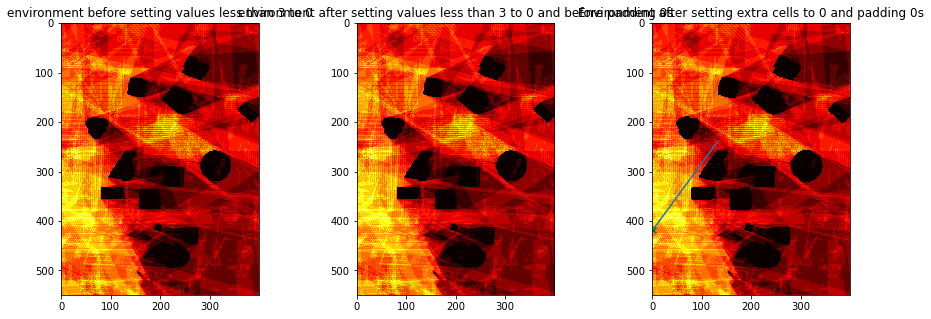

In [23]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from scipy.optimize import dual_annealing
from scipy.ndimage import binary_dilation
from scipy.ndimage import generate_binary_structure
import random
from IPython.display import clear_output
import os
import time
import copy
import warnings

warnings.filterwarnings('ignore')
plt.close()

minimum_bs=1

# Load the data from the CSV file
environment = genfromtxt(r'C:\Users\ben\OneDrive - University of Bath\5th year\FYP\Simulation Development\Working Copies\MATLAB\MyWork\2D_results\London_400x550.csv', delimiter=',')

# Flip the environment about the x-axis
environment = np.flipud(environment)

# Display environment before setting values less than 3 to 0
fig, axes = plt.subplots(ncols=3, figsize=(15,5))
axes[0].imshow(environment, cmap='hot', interpolation='nearest')
axes[0].set_title('environment before setting values less than 3 to 0')

# Set all values less than 3 to 0
environment[environment < minimum_bs] = 0

# Display environment after setting values less than 3 to 0
axes[1].imshow(environment, cmap='hot', interpolation='nearest')
axes[1].set_title('environment after setting values less than 3 to 0 and before padding 0s')

padding_radius=1

# Pad all values equal to 0 with 0s in all directions by 5 units
struct = generate_binary_structure(2, 1)
dilated = binary_dilation((environment == 0), structure=struct, iterations=padding_radius)
environment[dilated] = 0


# Display environment after setting extra cells to 0 and padding 0s
axes[2].imshow(environment, cmap='hot', interpolation='nearest')
axes[2].set_title('Environment after setting extra cells to 0 and padding 0s')

flag = 0

while not flag:
    x1, x2 = np.random.randint(low=0, high=environment.shape[1], size=2)
    y1, y2 = np.random.randint(low=0, high=environment.shape[0], size=2)
    start_point = (x1,y1)
    goal_point = (x2,y2)

    # start_point = (10,50)
    # goal_point = (190,45)

    if environment[y1,x1] != 0 and environment[y2,x2] != 0:
        flag = 1

cell_list = bresenham_line(*start_point,*goal_point)

plt.plot(*zip(*cell_list))

plt.scatter(start_point[0], start_point[1], marker="x", c="green")
plt.scatter(goal_point[0], goal_point[1], marker="x", c="red")

plt.show()


Method Dictionaries

In [24]:
population_generators = {
    1: generate_individual,
    2: generate_individual_2,
    3: generate_individual_3,
    4: generate_individual_4,
    5: generate_individual_5
}

selection_generators = {
    1: select_parents_rw,
    2: select_parents_tournament,
    3: select_parents_sus
}

crossover_generators = {
    1: crossover_sp,
    2: crossover_uniform,
    3: crossover_mp
}

mutation_generators = {
    1: mutate_random,
    2: mutate_swap,
    3: mutate_inversion
}

Generating Population...
100 / 100 individuals generated: 0.06803 Seconds elapsed
Evolving Population...
Generation 20/20: Average Fitness =  7.05800552639928, Best Fitness = 21.76697766768272888
Evolving Population...
Generation 20/20: Average Fitness =  7.9380859178344965, Best Fitness = 23.839051692970934
Evolving Population...
Generation 20/20: Average Fitness =  7.0295631735417485, Best Fitness = 25.14249128622977
Evolving Population...
Generation 20/20: Average Fitness =  12.187262942277684, Best Fitness = 27.387932079113838
Evolving Population...
Generation 20/20: Average Fitness =  7.884913751116657, Best Fitness = 21.685169285137344
Evolving Population...
Generation 20/20: Average Fitness =  12.486652640481356, Best Fitness = 29.406075284970244
Evolving Population...
Generation 20/20: Average Fitness =  7.412553679550237, Best Fitness = 28.1098424750099133
Evolving Population...
Generation 20/20: Average Fitness =  12.577364226547445, Best Fitness = 33.50460955660076
Evolving 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


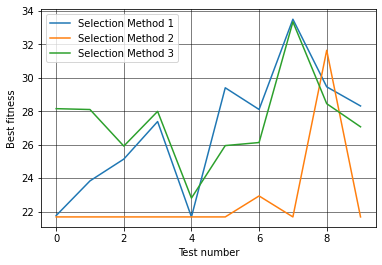

In [34]:
POPULATION_SIZE=100
NUM_GENERATIONS = 20
INDIVIDUAL_LENGTH=5
CROSSOVER_RATE = 0.8
MUTATION_RATE = 0.5

OPTIMAL_FITNESS=0
TIME_LIMIT_GA=5
STAGNATION_NUM=5
OPTIMAL_SOLUTION=[]

population_method=2
selection_method=1
crossover_method=1
mutation_method=1

timeout=100

# Generate the initial population
print(f"Generating Population...")

initial_population=[]

for i in range(POPULATION_SIZE):

    initial_population.append(population_generators[population_method](i, timeout))

    if initial_population[-1]==0:
        print(f"\nTime Limit reached")
        print(f"\n-----------------------------")

all_results=[]

for methods in range(1,4):

    method_results = []

    for a in range(10):

        population = initial_population.copy()

        global_best=[]
        average_fitness=[]
        best_fitnesses = []  # initialize the list of best fitness values

        print(f"\nEvolving Population...")

        start=time.time()

        termination_flag=0
        generation=0

        while termination_flag == 0:

            generation += 1

            # Select parents
            parents, fitnesses, usable_path_fitness, usable_paths = selection_generators[methods](population, start_point, goal_point)

            # Print the best individual in this generation
            best_fitness_index = usable_path_fitness.index(max(usable_path_fitness))

            best_individual = usable_paths[best_fitness_index][0]

            best_individual = concatenate(start_point, goal_point, best_individual)
            
            average_fitness.append((sum(fitnesses) / len(fitnesses))) # add the average fitness value to the list
            best_fitnesses.append(max(usable_path_fitness))  # add the maximum fitness value to the list

            if global_best==[]:
                global_best.append(usable_path_fitness[best_fitness_index])
                best_solution = best_individual
            elif usable_path_fitness[best_fitness_index] > global_best[-1]:
                global_best.append(usable_path_fitness[best_fitness_index])
                best_solution = best_individual
            else:
                global_best.append(global_best[-1])


            if generation==0:
                print(f"\nGeneration {generation}/{NUM_GENERATIONS}: Average Fitness =  {average_fitness[-1]}, Best Fitness = {global_best[-1]}", end='\r')
            else:
                print(f"Generation {generation}/{NUM_GENERATIONS}: Average Fitness =  {average_fitness[-1]}, Best Fitness = {global_best[-1]}", end='\r')

            # Create the next generation by crossover and mutation
            next_generation = []

            for i in range(0, POPULATION_SIZE, 2):

                parent1 = parents[0]
                parent2 = parents[1]
                child1, child2 = crossover_generators[crossover_method](parent1, parent2, CROSSOVER_RATE, INDIVIDUAL_LENGTH)
                child1 = mutation_generators[mutation_method](child1, MUTATION_RATE, INDIVIDUAL_LENGTH, environment, dimensions=2)
                child2 = mutation_generators[mutation_method](child1, MUTATION_RATE, INDIVIDUAL_LENGTH, environment, dimensions=2)
                next_generation.append(child1)
                next_generation.append(child2)

            # Replace the current population with the next generation
            population = next_generation

            current_time=round((time.time()-start),5)

            termination_flag=termination_check(generation,current_time,average_fitness,NUM_GENERATIONS, TIME_LIMIT_GA,STAGNATION_NUM,method='generations')


        if global_best[-1]>OPTIMAL_FITNESS:
            OPTIMAL_FITNESS=global_best[-1]
            OPTIMAL_SOLUTION=best_solution

        result = global_best[-1]

        method_results.append(result)
    
    all_results.append(method_results)

fig, ax = plt.subplots()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
ax.legend(loc='upper right')

for i, result in enumerate(all_results):
    ax.plot(result, label=f"Selection Method {i+1}")

ax.legend()
ax.set_xlabel("Test number")
ax.set_ylabel("Best fitness")

plt.show()

# if OPTIMAL_SOLUTION!=[]:

#     print(f"\nBest Result  = ", result)

#     max_fitness,final_solution = post_processing(OPTIMAL_SOLUTION)

#     fig = plt.figure()

#     ax = fig.add_subplot(111)
#     ax.imshow(environment, cmap='hot', interpolation='nearest')
#     ax.scatter(start_point[0],start_point[1],marker="x", c="green")
#     ax.scatter(goal_point[0],goal_point[1],marker="x", c="blue")
#     ax.plot(*zip(*OPTIMAL_SOLUTION), color='blue')
#     ax.plot(*zip(*final_solution), color='green')

#     print(f"\nPost Processing was beneficial: {len(OPTIMAL_SOLUTION)!=len(final_solution)}")

#     plt.show()


